In [73]:
import pandas as pd

# importing dataset 
data = pd.read_csv('house.csv')

# dropping the null values
data.dropna(inplace=True)

<AxesSubplot:>

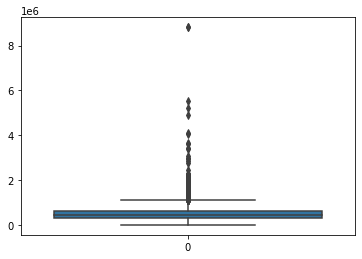

In [74]:
# importing the module
import seaborn as sns


# plot plot to visualize outliers
sns.boxplot( data=data['price'])

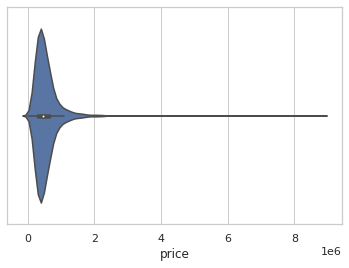

In [7]:
# setting the theme of the violin plot
sns.set_theme(style="whitegrid")

# plotting the violin plot
ax = sns.violinplot(x=data['price'])

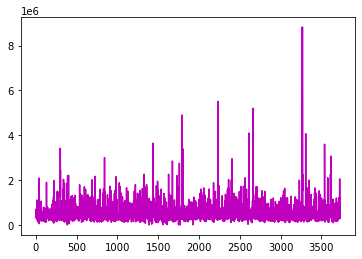

In [2]:
# importing the module
import matplotlib.pyplot as plt

# plotting scattered plot
plt.plot([i for i in range(len(data.price))], data.price , c ='m')

In [7]:
# data
data = [[10, 20], [20, 30], [30, 40], [40, 50], [50, 10]]

# importing pandas
import pandas as pd

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['input', 'output'])

# datahead
df.head()

,input,output
0,10,20
1,20,30
2,30,40
3,40,50
4,50,10


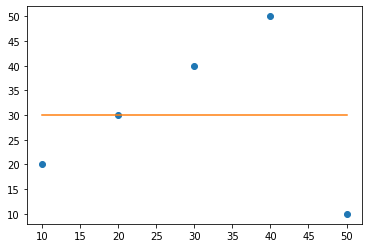

In [8]:
# importing the numpy module
import numpy as np

# plotting the input
plt.plot(df.input, df.output, 'o')

# creatig linear line
m, b = np.polyfit(df.input, df.output, 1)

# plotting regression line
plt.plot(df.input, m*df.input + b)


In [9]:
# importing the isloation forest
from sklearn.ensemble import IsolationForest

# copying dataset
isf_dataset = data.copy()

# initializing Isolation Forest
clf = IsolationForest(max_samples='auto', contamination=0.01)

# training
clf.fit(isf_dataset)

# finding anomalies
isf_dataset['Anomaly'] = clf.predict(isf_dataset)

# saving anomalies to a separate dataset for visualization purposes
anomalies = isf_dataset.query('Anomaly == -1')

TypeError: list indices must be integers or slices, not str

In [67]:
# importing modules
from numpy import mean
from numpy import std

# calculating mean and std
data_mean = mean(data.price)
data_std =  std(data.price)


# identify outliers after  3 std
cut_off = data_std * 3


lower = data_mean - cut_off
upper =data_mean + cut_off

In [68]:
# identify outliers in the price
outliers = [x for x in data.price if x < lower or x > upper]

# printing outliers
print("total outliers are :", len(outliers))

total outliers are : 47


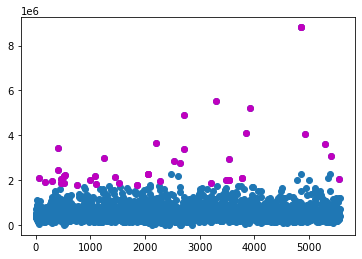

In [69]:
# plotting whole dataset
plt.scatter(data.price.index, data.price)

# using for loop to detect the outliers
for i in data.price:
    if i in outliers:
        
#         plotting the outliers
        plt.scatter(data.price[data.price == i].index[0], i, c='m')

In [70]:
#Using drop() to delete rows based on column value
data.drop(data.price[data.price > lower].index, inplace = True)
data.drop(data.price[data.price < upper].index, inplace = True)



<AxesSubplot:>

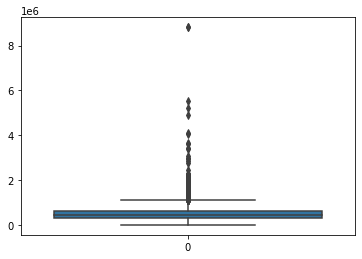

In [75]:
# importing dataset 
data = pd.read_csv('house.csv')

# dropping the null values
data.dropna(inplace=True)

# plot plot to visualize outliers
sns.boxplot( data=data['price'])

In [79]:
# importing the module
from numpy import percentile

# calculate interquartile range
q_25 = percentile(data.price, 25)
q_75 =  percentile(data.price, 75)

# calculating iterquartile range
iqr = q_75 - q_25


# calculate the outlier cutoff
cut_off = iqr * 1.5

# lower range and upper range
lower = q_25 - cut_off
upper = q_75 + cut_off

# identify outliers
outliers = [x for x in data.price if x < lower or x > upper]

# printing
print("total outliers :", len(outliers))

total outliers : 218


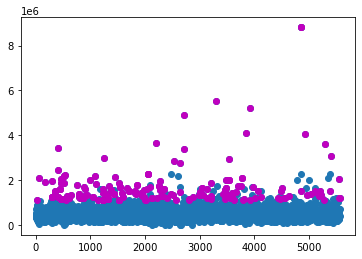

In [80]:
# plotting whole dataset
plt.scatter(data.price.index, data.price)

# using for loop to detect the outliers
for i in data.price:
    if i in outliers:
        
#         plotting the outliers
        plt.scatter(data.price[data.price == i].index[0], i, c='m')